In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import klib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [447]:
data_path = 'master.csv'
data = pd.read_csv(data_path)
# data = pd.read_excel(data_path)

In [448]:
# data cleaning
data = data.drop(['Unnamed: 12', 'Gender'], axis = 1)
data['population'] = data['population'].replace('None', 0).astype(int)

In [441]:
# Checking null values in the dataframe
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [442]:
# Summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844792e+06,3.911780e+06,0.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [444]:
data.groupby(['country', 'year'])['population'].sum().reset_index()

,country,year,population
0,Albania,1987,2674000
1,Albania,1988,2764300
2,Albania,1989,2803100
3,Albania,1992,2822500
4,Albania,1993,2807300
...,...,...,...
2316,Uzbekistan,2010,25651783
2317,Uzbekistan,2011,25978049
2318,Uzbekistan,2012,26381830
2319,Uzbekistan,2013,26838924


Text(0.5, 1.0, 'Generation')

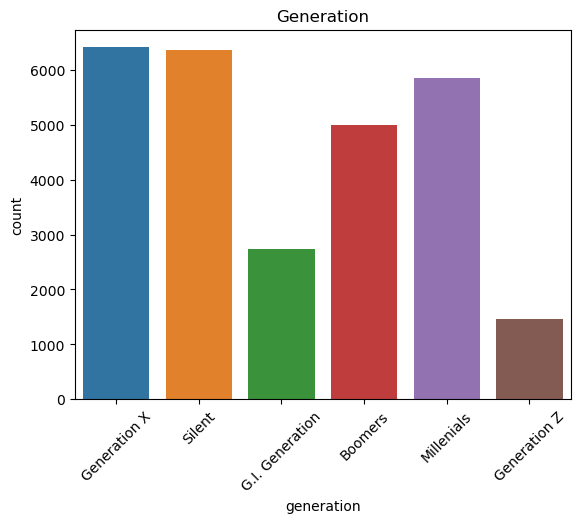

In [445]:
# Plot Frequency of different generations  with countplot
sns.countplot(x = 'generation', data = data)
plt.xticks(rotation = 45)
plt.title('Generation')

In [436]:
data.groupby(['age'])['suicides_no'].sum().reset_index()

,age,suicides_no
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
3,5-14 years,52264
4,55-74 years,1658443
5,75+ years,653118


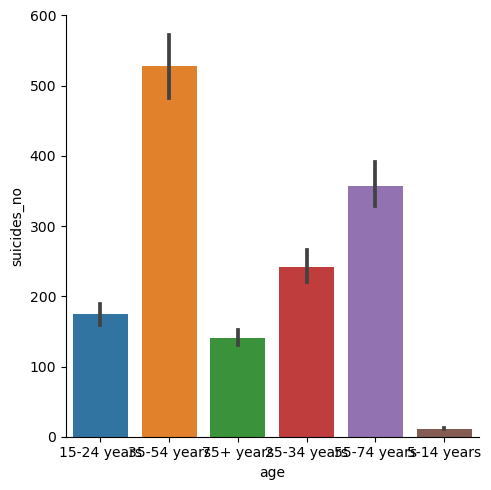

In [438]:
# Plot Number of suicides in different age groups
# data.groupby(['year', 'age'])['suicides_no'].sum().reset_index()

sns.catplot(y="suicides_no", x= "age",  data=data, kind="bar", label = 'age')
plt.show()

In [396]:
# Plot Suicides each year since 2000
data[data['year'] >= 2000].groupby(['year'])['suicides_no'].sum()

year
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
2016     15603
Name: suicides_no, dtype: int64

(array([2.2848e+04, 3.3060e+03, 8.5900e+02, 5.0600e+02, 1.9400e+02,
        7.3000e+01, 1.6000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00]),
 array([  0.   ,  22.497,  44.994,  67.491,  89.988, 112.485, 134.982,
        157.479, 179.976, 202.473, 224.97 ]),
 <BarContainer object of 10 artists>)

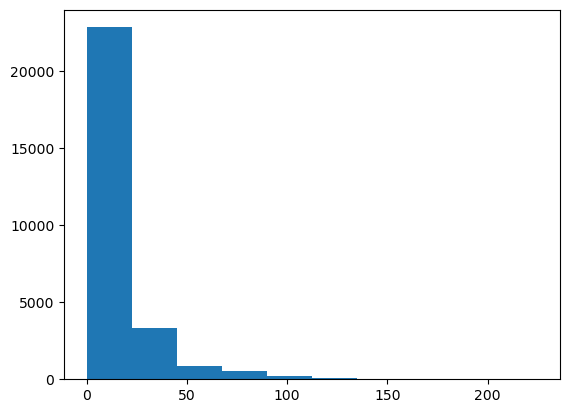

In [397]:
# Plot Distribution of suicides/100k pop
plt.hist(data['suicides/100k pop'])

In [398]:
# Top 10 Countries with maximum number of suicides
data.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

<Axes: xlabel='year', ylabel='suicides_no'>

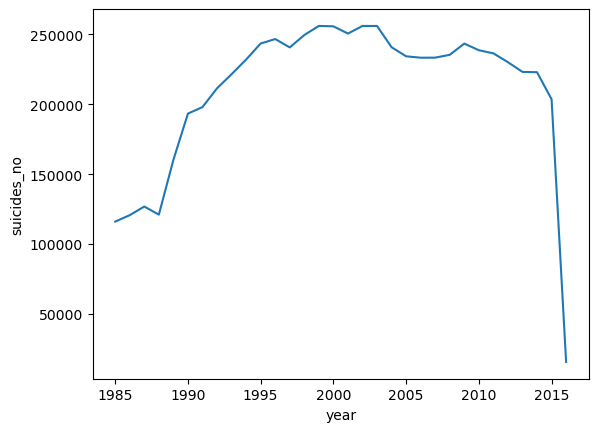

In [400]:
# Change in number of suicides each year
suicides_per_year = data.groupby(['year'])['suicides_no'].sum().reset_index()
sns.lineplot(x='year', y='suicides_no', data=suicides_per_year)

<Axes: xlabel='year', ylabel='gdp_per_capita ($)'>

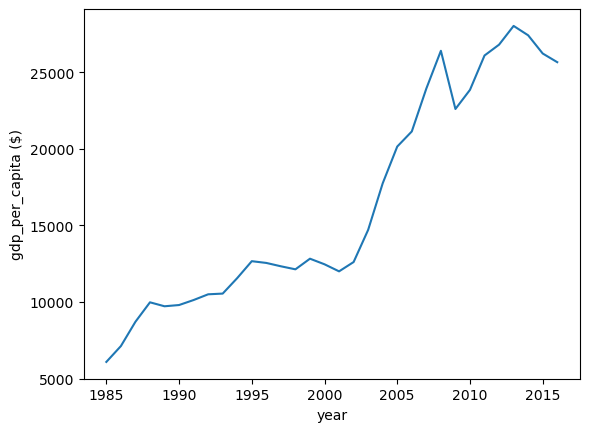

In [401]:
# Change in gdp_per_capita per year
gdp_per_capita_per_year = data.groupby(['year'])['gdp_per_capita ($)'].mean().reset_index()
sns.lineplot(x='year', y='gdp_per_capita ($)', data=gdp_per_capita_per_year)

In [402]:
# Top 10 countries with maximum number of suicides since 1985
data.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

In [403]:
# Top 10 countries with least number of suicides since 1985
data.groupby(['country'])['suicides_no'].sum().sort_values(ascending=True).head(10)

country
Dominica                  0
Saint Kitts and Nevis     0
San Marino                4
Antigua and Barbuda      11
Maldives                 20
Macau                    27
Oman                     33
Grenada                  38
Cabo Verde               42
Kiribati                 53
Name: suicides_no, dtype: int64

In [404]:
# Entfernen doppelter Werte
print(data.shape)

data.drop_duplicates(subset=['country', 'year', 'sex', 'age'], keep="last", inplace=True)

print(data.shape)

(27820, 12)
(27820, 12)


In [449]:
# Welche Variablen sind numerisch?
numeric_data = data.select_dtypes('number')
numeric_data.head()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1987,21,312900,6.71,NaN,796
1,1987,16,308000,5.19,NaN,796
2,1987,14,289700,4.83,NaN,796
3,1987,1,21800,4.59,NaN,796
4,1987,9,274300,3.28,NaN,796


In [450]:
# Welche Variablen sind kategorisch?
# note to self: changeg the 'gdp_for_year ($)' to numeric
categorical_data = data.select_dtypes('object')
categorical_data.head()

,country,sex,age,country-year,gdp_for_year ($),generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers


In [451]:
# ÜBERPRÜFEN Sie die value_counts für jeder Variablen
for col in categorical_data:
    print(col)
    print(categorical_data[col].value_counts())
    print('----------------------------------')

country
Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64
----------------------------------
sex
male      13910
female    13910
Name: sex, dtype: int64
----------------------------------
age
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64
----------------------------------
country-year
Albania1987     12
Poland1993      12
Panama2009      12
Panama2010      12
Panama2011      12
                ..
Austria2016     10
Croatia2016     10
Hungary2016     10
Armenia2016     10
Mongolia2016    10
Name: country-year, Length: 2321, dtype: int64
----------------------------------
 gdp

In [452]:
# Erkennung und Entfernung von Ausreißern (Outliers)
data_copy = data[:]

for col_name in numeric_data.drop('year', axis=1).columns:
    iqr = np.nanpercentile(data[col_name], 75) - np.nanpercentile(data[col_name], 25)
    upper_limit = np.nanpercentile(data[col_name], 75) + 1.5*iqr
    lower_limit = np.nanpercentile(data[col_name], 25) - 1.5*iqr
    print(f'{col_name}\n{iqr=}, {upper_limit=}, {lower_limit=}\n--------')

    data = data[(data[col_name] > lower_limit) & (data[col_name] < upper_limit)]


suicides_no
iqr=128.0, upper_limit=323.0, lower_limit=-189.0
--------
population
iqr=740438.25, upper_limit=1918175.625, lower_limit=-1043577.375
--------
suicides/100k pop
iqr=14.63, upper_limit=37.095, lower_limit=-21.425
--------
HDI for year
iqr=0.138, upper_limit=1.056, lower_limit=0.504
--------
gdp_per_capita ($)
iqr=24024.0, upper_limit=64716.0, lower_limit=-31380.0
--------


<Axes: xlabel='year', ylabel='population'>

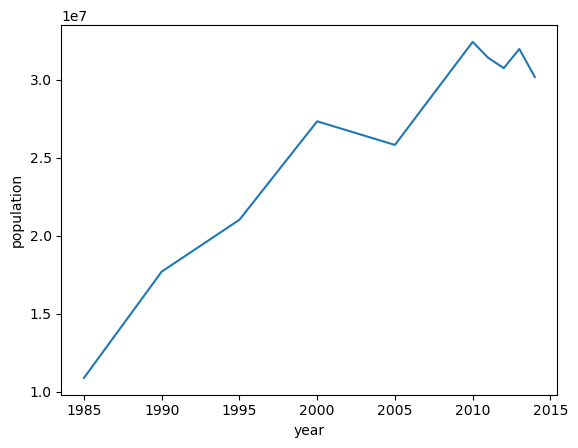

In [425]:
# Wer ist der ältere Kontakt?
age_75_by_year = data[data['age'] == '75+ years'].groupby('year')['population'].sum().reset_index()

sns.lineplot(x='year', y='population', data=age_75_by_year)

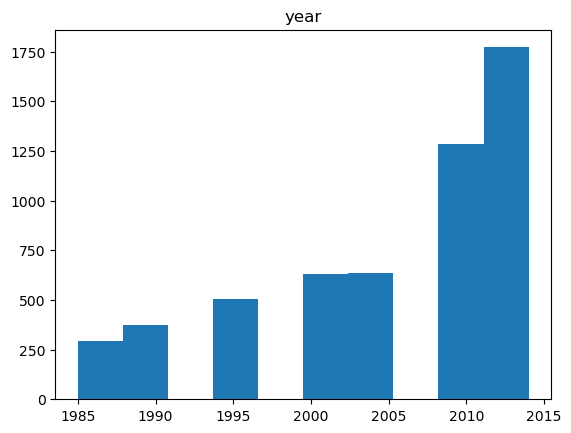

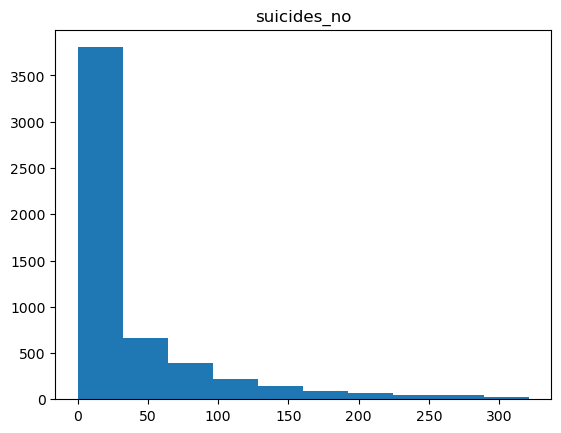

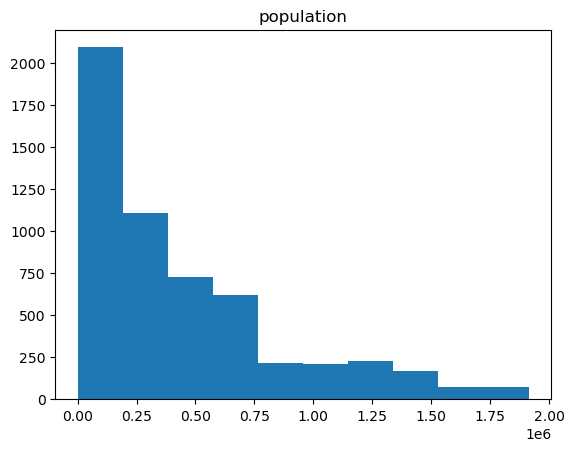

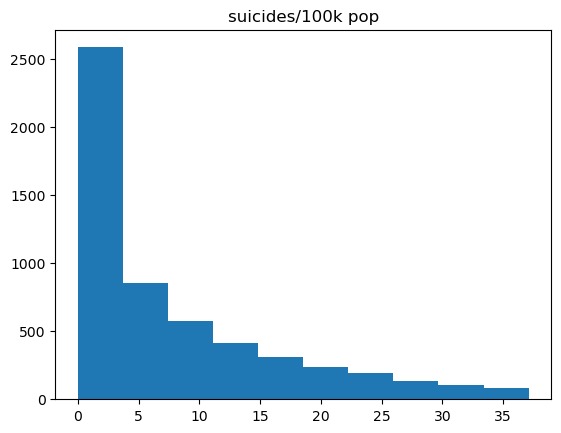

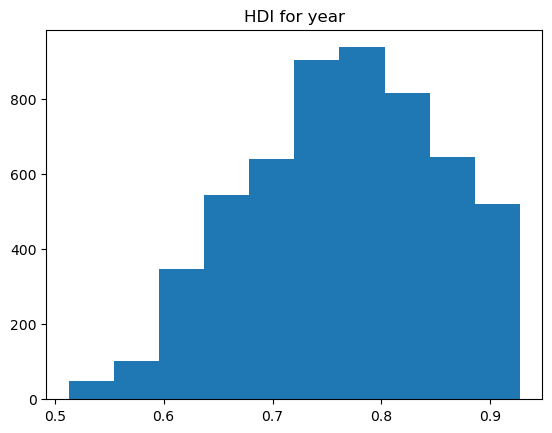

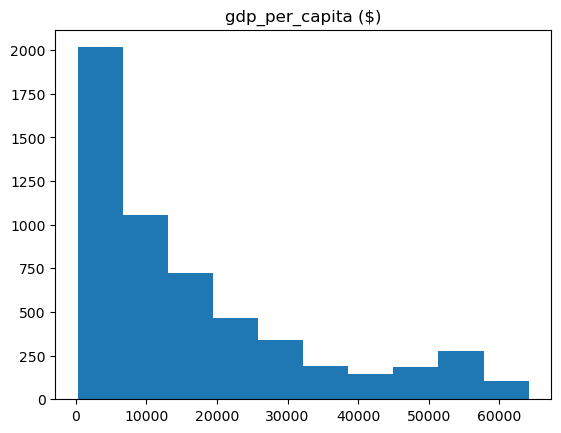

In [324]:
# Überprüfen Sie die Normalitätsverteilung
for col in data:
    if pd.api.types.is_numeric_dtype(data[col]):
        plt.hist(data[col])
        plt.title(col)
        plt.show()

/var/folders/9b/ny52bl9x5rj_jtsydmk5j96m0000gq/T/ipykernel_55297/1617354736.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(data.corr(), annot=True, cmap ='RdYlGn')


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.00,-0.03,-0.01,-0.07,0.33,0.25
suicides_no,-0.03,1.00,0.59,0.62,0.18,0.12
population,-0.01,0.59,1.00,0.08,0.09,0.03
suicides/100k pop,-0.07,0.62,0.08,1.00,0.12,0.10
HDI for year,0.33,0.18,0.09,0.12,1.00,0.81
gdp_per_capita ($),0.25,0.12,0.03,0.10,0.81,1.00


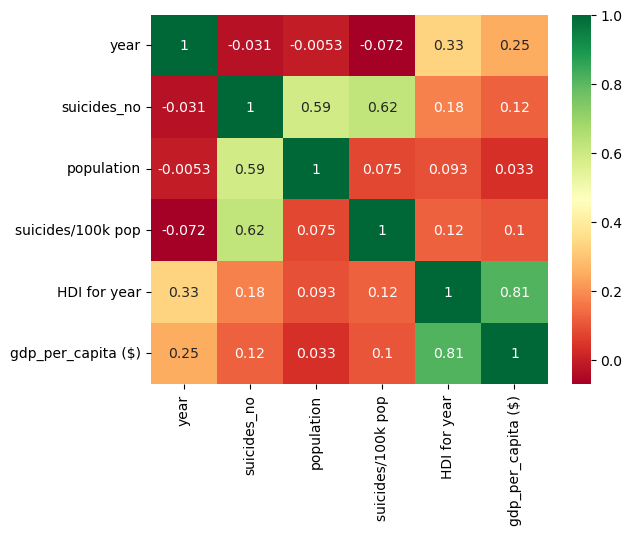

In [325]:
# Überprüfen Sie die Korrelation mit der Bibliothek Seaborn und mit der Bibliothek Klib
p=sns.heatmap(data.corr(), annot=True, cmap ='RdYlGn')

klib.corr_mat(data)

In [454]:
# Splitting des Modells
# Trainieren und testen Sie den Satz mit der Test_size = 0,3
X = data.drop(['country', 'gdp_per_capita ($)', 'sex', 'age', 'country-year', ' gdp_for_year ($) ', 'generation'], axis = 1)
y = data['gdp_per_capita ($)']

In [370]:
X.head()

,year,suicides_no,population,suicides/100k pop,HDI for year
72,1995,13,232900,5.58,0.619
73,1995,9,178000,5.06,0.619
74,1995,2,40800,4.90,0.619
75,1995,13,283500,4.59,0.619
76,1995,11,241200,4.56,0.619


In [371]:
y.head()

72    835
73    835
74    835
75    835
76    835
Name: gdp_per_capita ($), dtype: int64

In [455]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [456]:
print(f'{X_train.shape = }')
print(f'{y_train.shape = }')

print(f'{X_test.shape = }')
print(f'{y_test.shape = }')

X_train.shape = (3852, 5)
y_train.shape = (3852,)
X_test.shape = (1651, 5)
y_test.shape = (1651,)


In [376]:
# X_train= X_train.values.reshape(-1,1)
# X_test= X_test.values.reshape(-1,1)
# print(f'{len(X_train) = }')
# print(f'{len(X_test) = }')

len(X_train) = 19260
len(X_test) = 8255


In [ ]:
# Führen Sie das Modell mit sklearn aus: lineare Regression, knn-Regression
# Plot the actual value und the predicted value
# Determinate the mean square errors and r square for each model

In [247]:
# linear regression

In [458]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

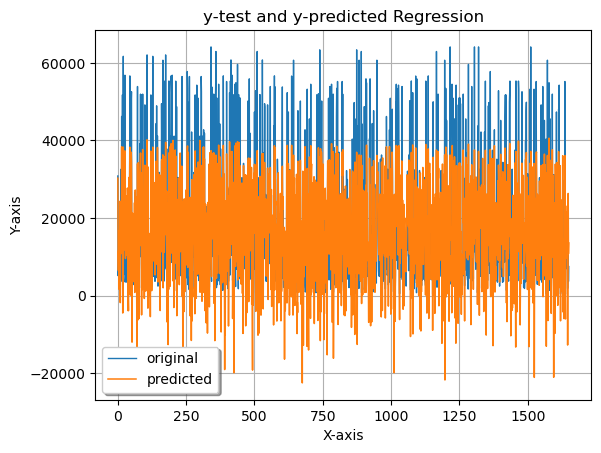

In [459]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted Regression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [460]:
from sklearn.metrics import r2_score,mean_squared_error

In [461]:
mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)

print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 90683535.19613807
r square : 0.6597263216065739


In [ ]:
# knn regression

In [464]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

In [469]:
r2_val = []

best_r2 = 0
best_n = 1

knn_models = {}
for K in range(1,50):
    
    model_knn = KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    
    knn_models[K] = model_knn 
    pred=model_knn.predict(X_test) #make prediction on test set

    r2 = (r2_score(y_test,pred)) #calculate rmse
    r2_val.append(r2) #store rmse values
    print('r2_score value for k= ' , K , 'is:', error)

    if r2 > best_r2:
        best_r2 = r2
        best_n = K
    
print(f'{best_r2=}, {best_n=}')


r2_score value for k=  1 is: 0.018767732703930173
r2_score value for k=  2 is: 0.018767732703930173
r2_score value for k=  3 is: 0.018767732703930173
r2_score value for k=  4 is: 0.018767732703930173
r2_score value for k=  5 is: 0.018767732703930173
r2_score value for k=  6 is: 0.018767732703930173
r2_score value for k=  7 is: 0.018767732703930173
r2_score value for k=  8 is: 0.018767732703930173
r2_score value for k=  9 is: 0.018767732703930173
r2_score value for k=  10 is: 0.018767732703930173
r2_score value for k=  11 is: 0.018767732703930173
r2_score value for k=  12 is: 0.018767732703930173
r2_score value for k=  13 is: 0.018767732703930173
r2_score value for k=  14 is: 0.018767732703930173
r2_score value for k=  15 is: 0.018767732703930173
r2_score value for k=  16 is: 0.018767732703930173
r2_score value for k=  17 is: 0.018767732703930173
r2_score value for k=  18 is: 0.018767732703930173
r2_score value for k=  19 is: 0.018767732703930173
r2_score value for k=  20 is: 0.01876773

In [470]:
model_knn = KNeighborsRegressor(n_neighbors = best_n)
model_knn.fit(X_train, y_train)

pred = model_knn.predict(X_test)

error = (r2_score(y_test,pred))
print('r-2 = ', error)

mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)
print('rmse = ', rmse)


r-2 =  0.043968977241780616
rmse =  15961.953296912061


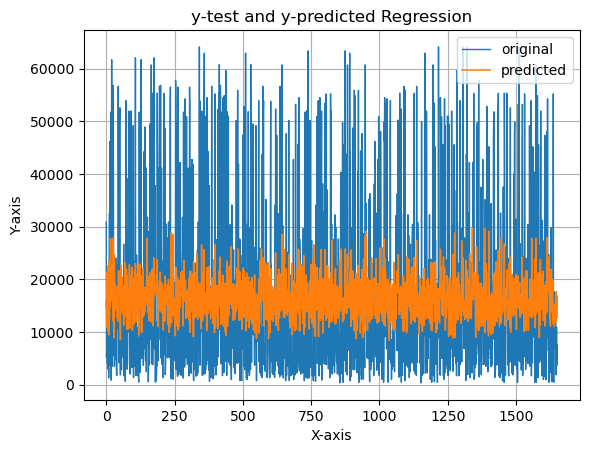

In [471]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, pred , linewidth=1.1, label="predicted")

plt.title("y-test and y-predicted Regression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend(loc='upper right',fancybox=True, shadow=False)

plt.grid(True)
plt.show()